## **Ali Hasnain**
---

## **To Remove Warnning**

In [1]:
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

## **Importing Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
import math
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## **Loading The dataset**

In [3]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [4]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## **Checking Null Value**

In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

## **plotting numerical columns**

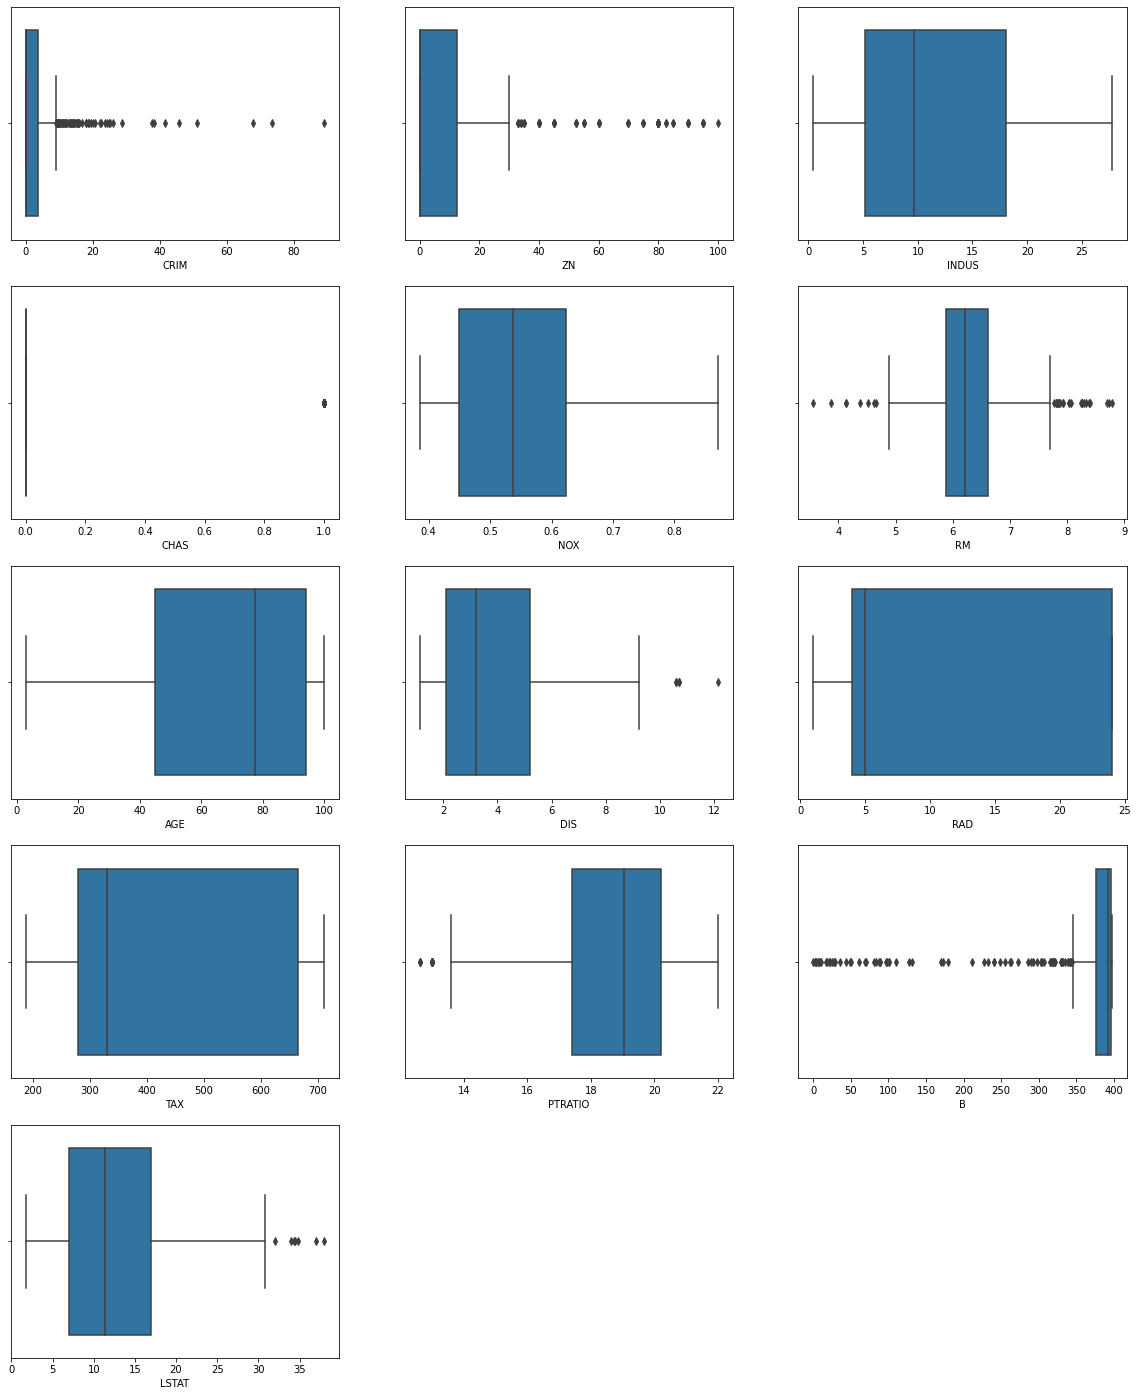

In [6]:
counter = 1
plt.figure(figsize=(20,30))
for i in df:
    plt.subplot(6,3,counter)
    sns.boxplot(df[i])
    counter = counter+1
plt.show()

## **Removing Outliers from this dataset**

In [7]:
def remove_outlier(df):
    col_vals = df.columns
    df1 = df.copy()
    df = df._get_numeric_data()

    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    for col in col_vals:
        for i in range(0, len(df[col])):
            if df[col][i] < lower_bound[col]:
                df[col][i] = lower_bound[col]

            if df[col][i] > upper_bound[col]:
                df[col][i] = upper_bound[col]

    for col in col_vals:
        df1[col] = df[col]

        return(df1)

## **Applying method of outlier**

In [8]:
remove_outlier(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## **Spliting the Dataset into X and Y**

In [11]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

## **Linear Regression**

In [12]:
lr = LinearRegression()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
pred = lr.predict(X_test)

In [17]:
pred

array([10.18663655,  6.41288062, 15.4569837 ,  7.37093425, 14.96850682,
       10.86910669, 14.16025775, 14.79192842, 12.94821205, 12.8393778 ,
       13.89547815, 13.48924763, 27.39244057,  9.59726808, 14.22160779,
        8.93242539, 16.53800266, 26.68918192,  0.69886135, 20.26499979,
        8.10238869,  7.72623466, 17.55830655, 10.89492862, 19.05662217,
       22.17159601,  9.97125804, 17.79485364, 14.14787229, 13.42417573,
       14.61755611,  8.96546871, 14.33838516, 18.60871202, 15.41320629,
       19.63431369,  6.0187107 , 11.44805024, 11.39465493,  6.61664797,
       15.55221371,  8.03105603,  0.83042608, 11.99659031,  9.73372688,
       19.99526876, 17.64623207,  5.63946024, 13.3879728 ,  9.51834723,
       13.04826695,  4.54599068, 15.069585  ,  8.6783742 ,  3.83509438,
        9.88161557, 16.59056894,  5.76761435,  8.5723013 , 14.58854721,
        7.14535924,  3.29009488,  5.24053074, 14.38722814,  8.11062448,
       17.95028514, 18.33265961,  8.58786537,  6.67925227, 16.16

In [22]:
train_score = lr.score(X_train, y_train)
print("Training score is", (train_score)*100)

Training score is 67.18002962940704


In [19]:
test_score = r2_score(y_test, pred)
print("Test Score is", (test_score)*100)

Test Score is 75.23649554283054


In [23]:
print('Mean absolute error is:', mean_absolute_error(y_test, pred))

Mean absolute error is: 2.630396306606109


In [24]:
print('Mean squared error is:', mean_squared_error(y_test, pred))

Mean squared error is: 12.12480074733769


In [25]:
print('Root Mean squared error is:', math.sqrt(mean_squared_error(y_test, pred)))

Root Mean squared error is: 3.48206845816358


---

## **Decision Tree**

In [26]:
dt = DecisionTreeRegressor()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [29]:
pred = dt.predict(X_test)

In [30]:
pred

array([ 6.29,  5.39, 17.73,  9.88, 18.66, 10.45, 27.71, 21.32, 14.19,
       12.92, 16.21, 27.71, 13.33, 10.45, 11.41,  3.32, 25.41, 13.33,
        3.11, 15.17,  5.81,  9.14, 19.88, 10.26, 14.52, 24.91, 13.51,
       15.17, 18.66, 13.59, 13.98,  6.87, 17.21,  3.26, 17.44, 11.1 ,
        4.73, 10.56, 16.03,  9.88, 15.1 ,  6.92,  3.11,  8.77,  8.2 ,
       19.92, 19.88,  9.88, 14.7 ,  8.65, 12.43,  4.16, 18.66,  7.01,
        7.44, 12.67, 17.73,  3.56,  6.29, 13.15,  5.29,  2.87,  5.08,
       13.28, 12.93, 23.98, 20.31,  7.51,  4.7 , 18.76, 10.21, 10.74,
       24.39,  7.79, 10.45, 19.77, 15.76,  3.11, 21.24, 29.68,  8.01,
       23.29,  7.79, 19.77, 14.81,  6.92, 14.65,  6.87, 10.59, 12.6 ,
       13.45, 27.38, 13.04, 13.65, 14.  , 15.03,  8.88, 13.33, 23.98,
       19.69,  9.74, 10.45])

In [34]:
print('Training score is:', dt.score(X_train, y_train))
print('Test score is:', (dt.score(X_test, y_test))*100)
print('Accuracy is:', dt.score(X_test, y_test)*100)
print('Mean absolute error is:', mean_absolute_error(y_test, pred))
print('Mean squared error is:', mean_squared_error(y_test, pred))
print('Root Mean squared error is:', math.sqrt(mean_squared_error(y_test, pred)))
print('R2 score is:', (r2_score(y_test, pred))*100)

Training score is: 1.0
Test score is: 55.13717122869131
Accuracy is: 55.13717122869131
Mean absolute error is: 3.0813235294117645
Mean squared error is: 21.965907965686284
Root Mean squared error is: 4.686780127730154
R2 score is: 55.13717122869131


---

## **K-NeighborsRegressor**

In [35]:
knn = KNeighborsRegressor()

In [36]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [37]:
pred = knn.predict(X_test)

In [39]:
pred

array([ 6.986 ,  3.87  , 16.794 ,  6.808 , 15.398 ,  9.744 , 10.044 ,
       16.62  , 14.412 , 14.142 , 11.258 , 17.466 , 15.254 , 13.324 ,
       10.118 , 14.098 , 19.936 , 13.476 ,  3.552 , 23.998 ,  6.14  ,
        3.87  , 17.298 , 11.272 , 21.082 , 16.07  , 13.824 , 21.238 ,
       11.258 , 12.49  , 10.578 , 10.118 , 23.382 , 12.428 , 17.7   ,
       16.79  , 10.174 ,  6.654 , 13.996 ,  6.808 , 12.994 ,  8.108 ,
        6.29  ,  9.092 ,  8.222 , 16.574 , 17.638 ,  6.808 , 13.564 ,
       10.386 , 11.928 ,  6.874 , 14.116 , 12.994 ,  7.21  , 12.118 ,
       22.484 ,  5.226 , 10.186 , 10.116 ,  7.022 ,  6.038 ,  8.284 ,
        8.184 ,  4.334 , 11.258 , 16.468 ,  6.626 ,  3.936 , 17.758 ,
        8.392 , 12.1   , 22.178 ,  5.74  , 13.824 , 28.515 , 15.642 ,
        6.894 , 22.556 , 20.976 ,  8.258 , 16.688 ,  7.238 , 22.294 ,
       13.082 ,  7.618 , 18.316 ,  9.162 ,  6.03  , 16.946 ,  8.146 ,
       24.0245, 19.0745,  9.754 , 12.146 , 17.48  , 17.472 , 15.254 ,
       21.3   , 22.1

In [41]:
print('Training score is:', (knn.score(X_train, y_train))*100)
print('Test score is:', (knn.score(X_test, y_test))*100)
print('Accuracy is:', knn.score(X_test, y_test)*100)
print('Mean absolute error is:', mean_absolute_error(y_test, pred))
print('Mean squared error is:', mean_squared_error(y_test, pred))
print('Root Mean squared error is:', math.sqrt(mean_squared_error(y_test, pred)))
print('R2 score is:', (r2_score(y_test, pred))*100)

Training score is: 65.03129318859932
Test score is: 51.96479098353745
Accuracy is: 51.96479098353745
Mean absolute error is: 3.4702745098039216
Mean squared error is: 23.519180784313725
Root Mean squared error is: 4.849657800743649
R2 score is: 51.96479098353745
